## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.naive_bayes import MultinomialNB 


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548, 3)

In [7]:
X_test.shape

(4850, 3)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## Naive Bayes model

In [10]:
cv = CountVectorizer()

In [11]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [12]:
nb = MultinomialNB()

In [13]:
pipe = make_pipeline(text_vectorizer, nb)

In [14]:
params = {
    'multinomialnb__alpha':[0.1, 2], 
    'columntransformer__countvectorizer__ngram_range':[(1,2), (1,3)], 
    'columntransformer__countvectorizer__max_df':[0.8, 0.9, 1],
    'columntransformer__countvectorizer__min_df':[0, 0.1, 0.2],
    'columntransformer__countvectorizer__stop_words':[None, 'english']
}

In [15]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [16]:
gs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X,

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('countvectorizer',
                                                                         CountVectorizer(),
                                                                         'full_text')],
                                                          verbose_feature_names_out=False)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'columntransformer__countvectorizer__max_df': [0.8,
                                                                        0.9,
                                                                        1],
                         'columntransformer__countvectorizer__min_df': [0, 0.1,
           

In [17]:
gs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(max_df=0.8,
                                                                  min_df=0,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'full_text')],
                                   verbose_feature_names_out=False)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [18]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__countvectorizer__max_df,param_columntransformer__countvectorizer__min_df,param_columntransformer__countvectorizer__ngram_range,param_columntransformer__countvectorizer__stop_words,param_multinomialnb__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.775271,0.045010,0.273890,0.041763,0.8,0,"(1, 2)",None,0.1,{'columntransformer__countvectorizer__max_df':...,0.808591,0.803780,0.804124,0.818494,0.809557,0.808909,0.005322,1
1,1.683294,0.047259,0.238510,0.063451,0.8,0,"(1, 2)",None,2,{'columntransformer__countvectorizer__max_df':...,0.510997,0.512027,0.510653,0.511172,0.512204,0.511411,0.000602,37
2,1.189915,0.096418,0.172730,0.021012,0.8,0,"(1, 2)",english,0.1,{'columntransformer__countvectorizer__max_df':...,0.743986,0.753265,0.746048,0.757305,0.744242,0.748969,0.005360,5
3,1.270218,0.177877,0.178547,0.009977,0.8,0,"(1, 2)",english,2,{'columntransformer__countvectorizer__max_df':...,0.509966,0.510309,0.509622,0.510485,0.510485,0.510173,0.000335,39
4,3.504994,0.142971,0.419957,0.101533,0.8,0,"(1, 3)",None,0.1,{'columntransformer__countvectorizer__max_df':...,0.801718,0.793471,0.789347,0.806463,0.799931,0.798186,0.006073,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.697120,0.026458,0.000000,0.000000,1,0.2,"(1, 2)",english,2,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
68,1.576702,0.070639,0.000000,0.000000,1,0.2,"(1, 3)",None,0.1,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
69,1.520965,0.018561,0.000000,0.000000,1,0.2,"(1, 3)",None,2,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
70,0.977151,0.026656,0.000000,0.000000,1,0.2,"(1, 3)",english,0.1,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64


In [19]:
y_preds = gs.predict(X_test)

In [20]:
y_preds

array(['crazyideas', 'crazyideas', 'showerthoughts', ..., 'crazyideas',
       'showerthoughts', 'crazyideas'], dtype='<U14')

### Accuracy score

In [21]:
gs.score(X_test, y_test)

0.7993814432989691

In [22]:
accuracy_score(y_test, y_preds)

0.7993814432989691

### Recall/sensitivity score

In [23]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.8923948220064725

### Precision score

In [24]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.7572948849982836

### F1 Score

In [25]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.8193129062209842

### Confusion Matrix

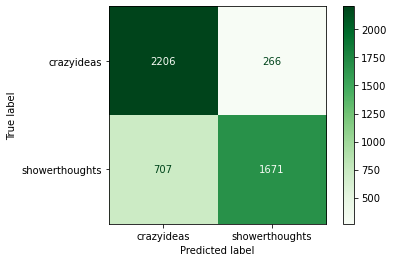

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens')